# Prerequisite
* Load required packages and load images (already uploaded on  MSTeams files) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Submit the demo on Blackboard by April 23, 2024 in **.ipynb** format.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY following opencv functions for any type of opencv operations**

>[cv.imread](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56),
>[cv.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04),
>[cv.cvtColor](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab),
>[cv.getGaussianKernel](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa),
>[cv.getDerivKernels](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga6d6c23f7bd3f5836c31cfae994fc4aea),
>[cv.erode](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb)
>[cv.dilate](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c)

> [all core operations](https://docs.opencv.org/3.4/d2/de8/group__core__array.html) {e.g. Matrix Addition, Subtraction, Multiplication, Inverse, Finding Min-Max in Matrix, Element-wise Power of Matrix, and much more...}

#DEMO for Morphological Processing

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# 1) Display following stages
## a) Load 'A.png'

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


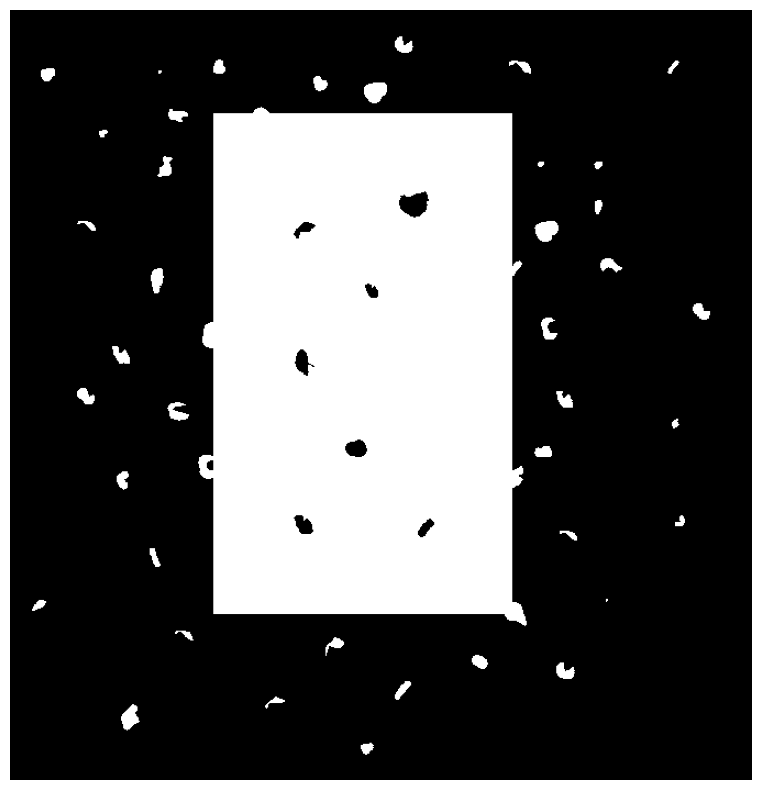

In [ ]:
#@title
img =  cv.imread('/content/A.png', cv.IMREAD_GRAYSCALE)
kernel_sz1 = np.ones(1)
## Change Data type of image ####################
img = cv.filter2D(img, cv.CV_16U, kernel_sz1)
#################################################
thresh = 127
img = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)[1]
print('Data_type is {}', img.dtype)
print('Image Size is {}'.format(img.shape))
print('Image min and max are ({}, {})'.format(img.min(),img.max()))
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

##b) Define and display $20\times20$ rectangular structuring element

Data_type is {} uint8
Image Size is (20, 20)
Image min and max are (1, 1)


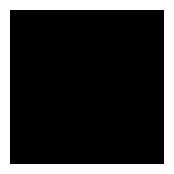

In [ ]:
#@title
SE1	=	cv.getStructuringElement(	cv.MORPH_RECT, (20,20))

print('Data_type is {}', SE1.dtype)
print('Image Size is {}'.format(SE1.shape))
print('Image min and max are ({}, {})'.format(SE1.min(),SE1.max()))
plt.figure(figsize=(2,2))
plt.imshow(SE1, cmap='gray')
plt.axis('off')
plt.show()

##c) Erode a) with b)

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


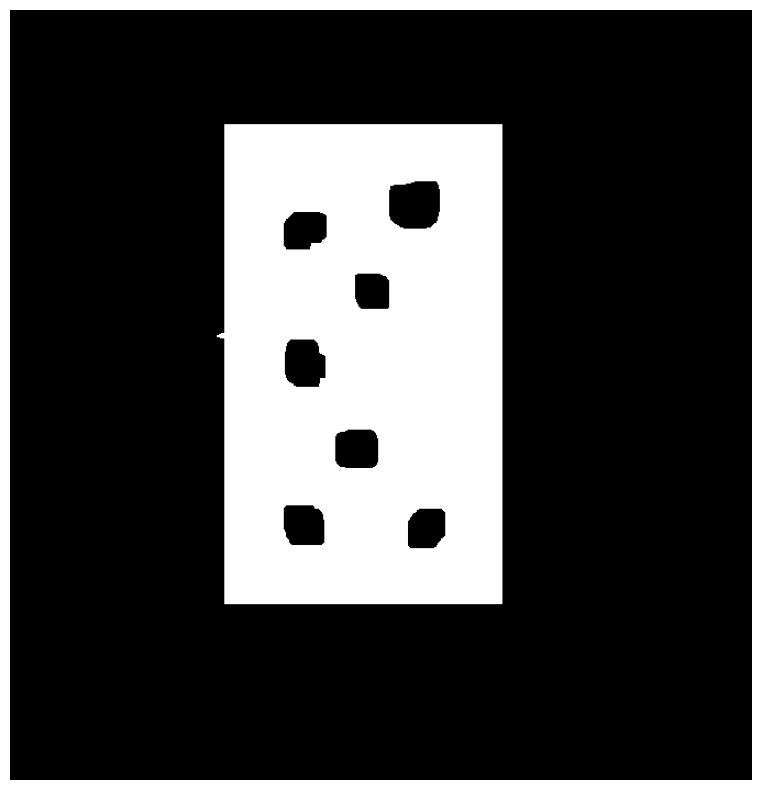

In [ ]:
#@title
img_erode = cv.erode(img, SE1,iterations = 1)
print('Data_type is {}', img_erode.dtype)
print('Image Size is {}'.format(img_erode.shape))
print('Image min and max are ({}, {})'.format(img_erode.min(),img_erode.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_erode, cmap='gray')
plt.axis('off')
plt.show()

##d) dilate c) with b) two times

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


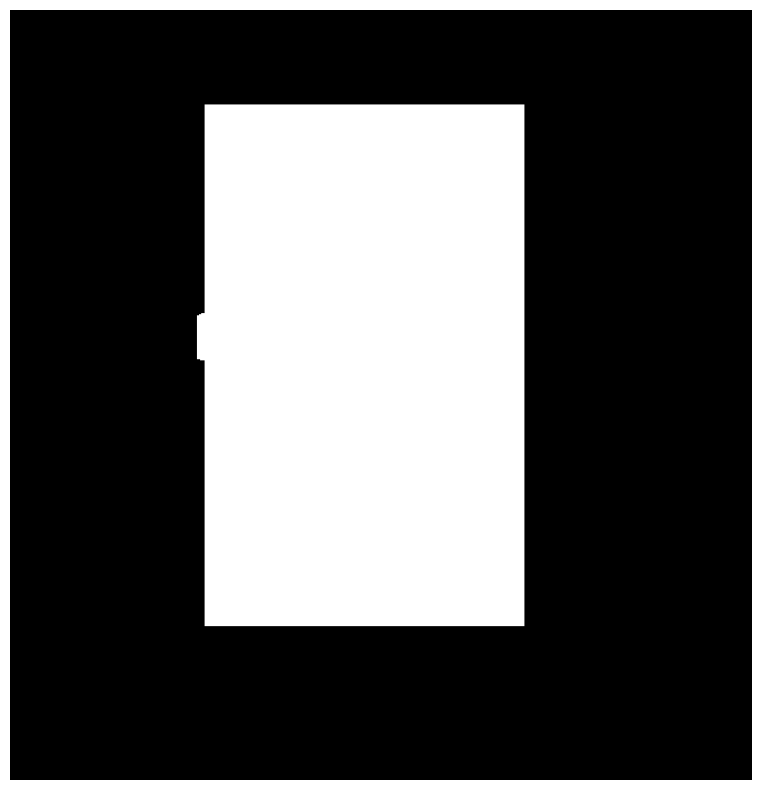

In [ ]:
#@title
img_e_d = cv.dilate(img_erode, SE1,iterations = 2)
print('Data_type is {}', img_e_d.dtype)
print('Image Size is {}'.format(img_e_d.shape))
print('Image min and max are ({}, {})'.format(img_e_d.min(),img_e_d.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_e_d, cmap='gray')
plt.axis('off')
plt.show()

##e) erode d) with b) three times then dilate the output with $4\times4$ rectangular structuring element 8 times

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


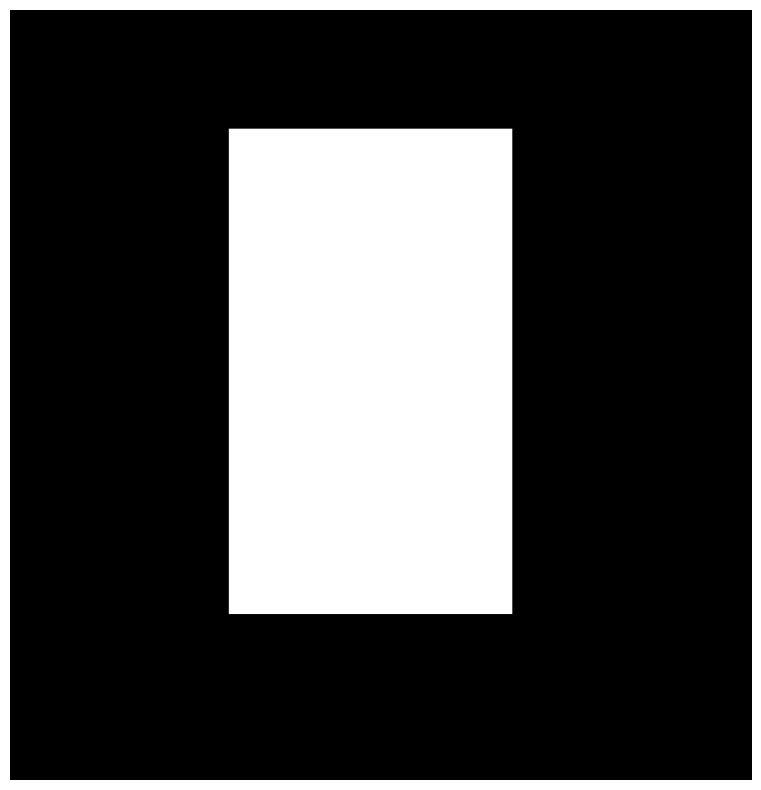

In [ ]:
#@title
img_e_d_d_e = cv.erode(img_e_d, SE1,iterations = 3)

SE2	=	cv.getStructuringElement(	cv.MORPH_RECT, (4,4))
img_e_d_d_e = cv.dilate(img_e_d_d_e, SE2,iterations = 8)

#SE3	=	cv.getStructuringElement(	cv.MORPH_RECT, (4,4),(0,0))
#img_e_d_d_e = cv.dilate(img_e_d_d_e, SE3,iterations = 6)

print('Data_type is {}', img_e_d_d_e.dtype)
print('Image Size is {}'.format(img_e_d_d_e.shape))
print('Image min and max are ({}, {})'.format(img_e_d_d_e.min(),img_e_d_d_e.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_e_d_d_e, cmap='gray')
plt.axis('off')
plt.show()

##f) xor a) with e)

> Indented block



Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


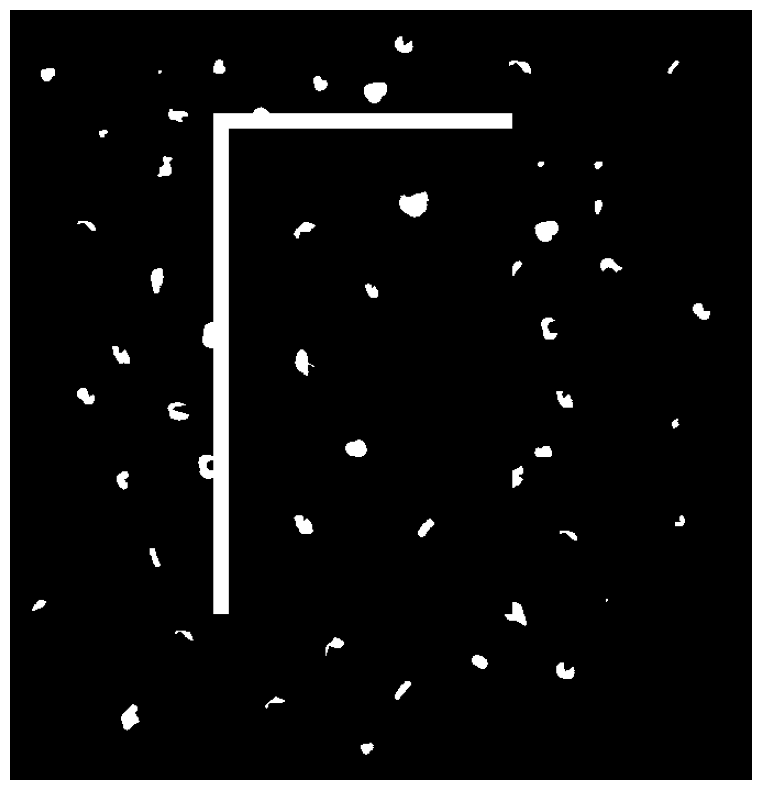

In [ ]:
#@title
img_b = cv.bitwise_xor(img, img_e_d_d_e)
print('Data_type is {}', img_b.dtype)
print('Image Size is {}'.format(img_b.shape))
print('Image min and max are ({}, {})'.format(img_b.min(),img_b.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_b, cmap='gray')
plt.axis('off')
plt.show()

##g) Design a shifting operation using dilation by changing origin of structuring element, so that whole binary image is shifted. Shift e) in such a way, after xor with a) rectangle disappears from a). Display final image.

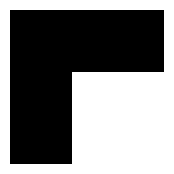

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


(-0.5, 674.5, 700.5, -0.5)

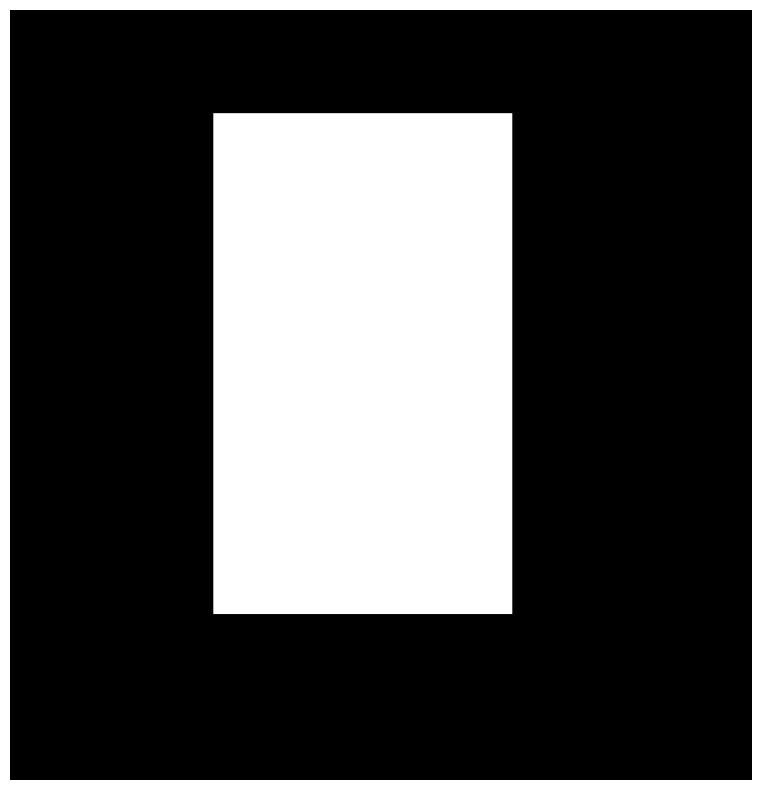

In [ ]:
#@title
#SE3	=	cv.getStructuringElement(	cv.MORPH_RECT, (3,3),anchor=(-1,-1))
SE3 = np.zeros((5,5),dtype=np.uint8)
SE3[2:,2:] = 1

plt.figure(figsize=(2,2))
plt.imshow(SE3, cmap='gray')
plt.axis('off')
plt.show()

img_e_d_d_e1 = cv.dilate(img_e_d_d_e, SE3,iterations = 7)

print('Data_type is {}', img_e_d_d_e1.dtype)
print('Image Size is {}'.format(img_e_d_d_e1.shape))
print('Image min and max are ({}, {})'.format(img_e_d_d_e1.min(),img_e_d_d_e1.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_e_d_d_e1, cmap='gray')
plt.axis('off')
#plt.show()

Data_type is {} uint16
Image Size is (701, 675)
Image min and max are (0, 255)


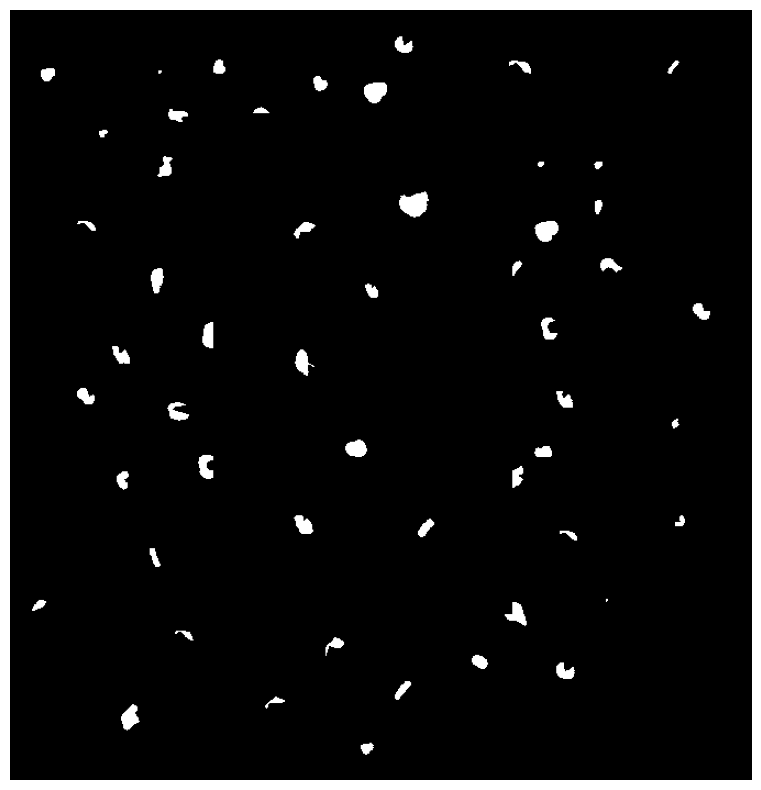

In [ ]:
#@title
img_c = cv.bitwise_xor(img, img_e_d_d_e1)
print('Data_type is {}', img_c.dtype)
print('Image Size is {}'.format(img_c.shape))
print('Image min and max are ({}, {})'.format(img_c.min(),img_c.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_c, cmap='gray')
plt.axis('off')
plt.show()

#LAB Assignment [15 Marks]

# Q1) Remove 'T' from 'UTK.tif' using structuring element in 'T.tif' with the help of erosion,dilation, xor and and operations ONLY. Display and explain final output.
#[5 Marks]

# Q2)Extract middle large bone from 'B.tif' with the help of erosion,dilation, xor,and and threshold operations ONLY. Create your structuring elements as per requirement.Display the binary image of middle large bone and explain the process.
#[10 Marks]